# Indiana Flood Risk
## Deep Neural Networks for Supervised Learning - Regression

In [1]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns  #Seaborn is another powerful visulization library for Python
from sklearn.linear_model import Ridge
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import shap

In [3]:
path = "C:\\Users\jmatney\Documents\GitHub\IndianaRisk\data"
df = pd.read_csv(os.path.join(path, "IndianaRisk.csv"))

In [4]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\scripts'

In [5]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  


Shape of the Dataset: (100, 42)


,subwatershed,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,...,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg,claims_total_building_insurance_coverage_avg
0,4.040001e+10,106.11,54.56,0.45,85.49,3.97,22.38,0.04,0.53,4.72,...,1.47,18.41,23.36,0.15,6789.38,5329.28,2861.72,6040.96,64285.55,33104.28
1,4.040001e+10,54.66,45.84,0.33,38.18,3.10,13.28,0.01,0.37,3.23,...,1.22,6.01,8.10,0.15,6789.38,5329.28,2861.72,6040.96,29839.39,15823.07
2,4.050001e+10,89.52,74.92,0.20,54.63,3.66,13.57,0.14,0.45,2.06,...,0.08,2.66,49.32,0.15,6789.38,5329.28,2861.72,6040.96,55680.81,179.54
3,4.050001e+10,105.46,79.94,0.21,51.75,3.61,14.96,0.06,0.44,2.12,...,0.09,4.43,60.33,0.92,5735.26,4511.41,2418.30,5107.41,37778.49,26955.98
4,4.100005e+10,87.28,64.13,0.27,28.41,2.42,13.24,0.49,0.53,2.01,...,5.10,2.54,28.17,21.89,5639.30,4438.93,2379.89,5025.40,46515.81,20702.79


# Metadata
*	**subwatershed** - a unique Id for each subwatershed

### Data Exploration

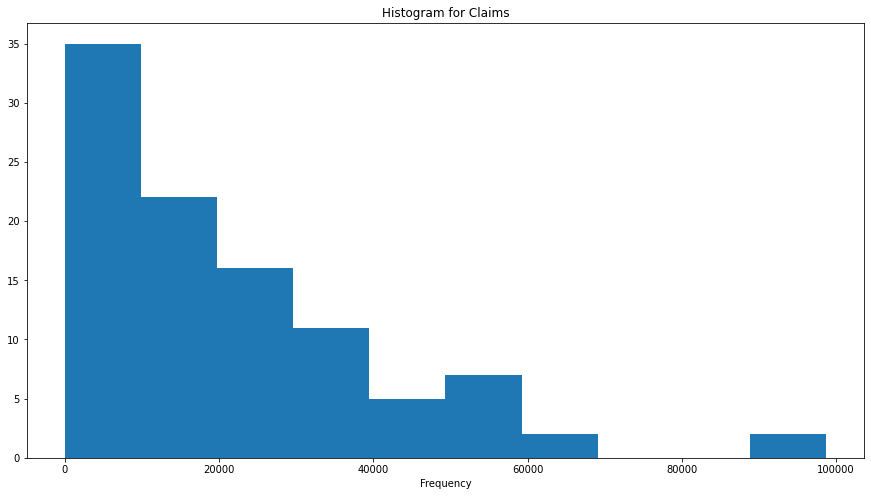

In [6]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df["claims_total_building_insurance_coverage_avg"])  
plt.title("Histogram for Claims")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD69BFEE08>,
      dtype=object)

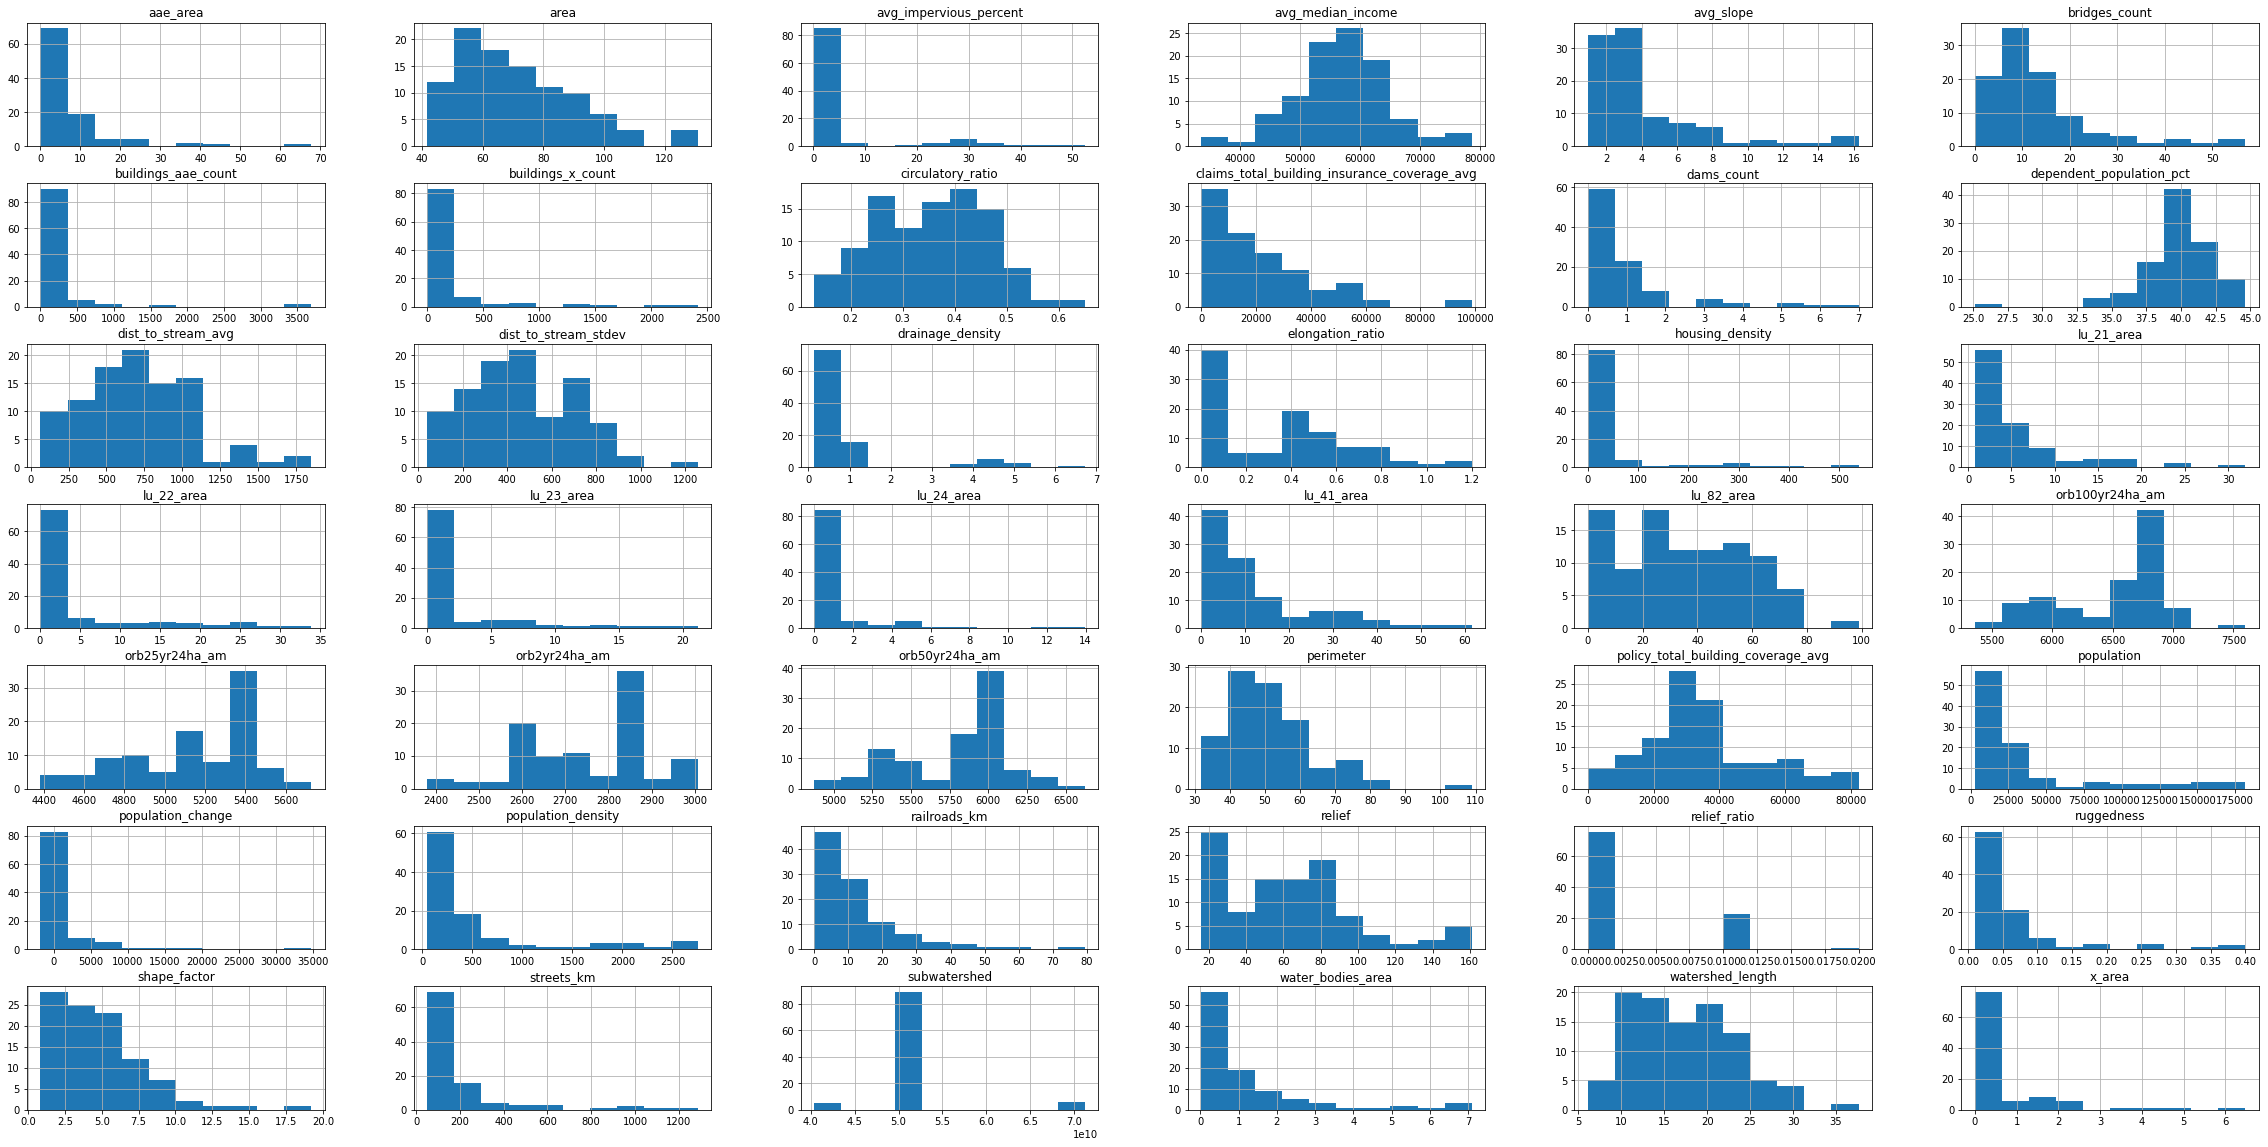

In [7]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df.hist(figsize=(40,20))

### Data Engineering

In [8]:
#Define a variable for each type of feature
target = ["claims_total_building_insurance_coverage_avg"]
test = [x for x in df if x != "claims_total_building_insurance_coverage_avg"]
numeric_columns = [x for x in test if x != "subwatershed"]

In [9]:
print("Shape of Data:",df.shape)
print("Distinct Datatypes:",df.dtypes.unique())
df[numeric_columns].head(5)

Shape of Data: (100, 42)
Distinct Datatypes: [dtype('float64')]


,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,106.11,54.56,0.45,85.49,3.97,22.38,0.04,0.53,4.72,0.0,...,7.64,1.47,18.41,23.36,0.15,6789.38,5329.28,2861.72,6040.96,64285.55
1,54.66,45.84,0.33,38.18,3.10,13.28,0.01,0.37,3.23,0.0,...,5.19,1.22,6.01,8.10,0.15,6789.38,5329.28,2861.72,6040.96,29839.39
2,89.52,74.92,0.20,54.63,3.66,13.57,0.14,0.45,2.06,0.0,...,0.39,0.08,2.66,49.32,0.15,6789.38,5329.28,2861.72,6040.96,55680.81
3,105.46,79.94,0.21,51.75,3.61,14.96,0.06,0.44,2.12,0.0,...,0.33,0.09,4.43,60.33,0.92,5735.26,4511.41,2418.30,5107.41,37778.49
4,87.28,64.13,0.27,28.41,2.42,13.24,0.49,0.53,2.01,0.0,...,8.43,5.10,2.54,28.17,21.89,5639.30,4438.93,2379.89,5025.40,46515.81


### Feature Selection using the LassoCV estimator

In [10]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

Automatically created module for IPython interactive environment


In [11]:
X = df[numeric_columns]

In [12]:
X.head(5)

,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,106.11,54.56,0.45,85.49,3.97,22.38,0.04,0.53,4.72,0.0,...,7.64,1.47,18.41,23.36,0.15,6789.38,5329.28,2861.72,6040.96,64285.55
1,54.66,45.84,0.33,38.18,3.10,13.28,0.01,0.37,3.23,0.0,...,5.19,1.22,6.01,8.10,0.15,6789.38,5329.28,2861.72,6040.96,29839.39
2,89.52,74.92,0.20,54.63,3.66,13.57,0.14,0.45,2.06,0.0,...,0.39,0.08,2.66,49.32,0.15,6789.38,5329.28,2861.72,6040.96,55680.81
3,105.46,79.94,0.21,51.75,3.61,14.96,0.06,0.44,2.12,0.0,...,0.33,0.09,4.43,60.33,0.92,5735.26,4511.41,2418.30,5107.41,37778.49
4,87.28,64.13,0.27,28.41,2.42,13.24,0.49,0.53,2.01,0.0,...,8.43,5.10,2.54,28.17,21.89,5639.30,4438.93,2379.89,5025.40,46515.81


In [13]:
y = df[target]
X = df[numeric_columns]

## Lasso Feature Selection 

In [14]:
lasso_clf = LassoCV().fit(X, y.values.ravel())
lasso_importance = np.abs(lasso_clf.coef_)
print(lasso_importance)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.89031499e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.00931799e-01]


## Ridge Feature Selection

In [15]:
ridge_clf = Ridge().fit(X, y.values.ravel())
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

array([6.033450e+02, 3.645350e+02, 5.424430e+03, 1.403640e+02,
       1.475533e+03, 1.575232e+03, 9.492671e+03, 9.124280e+02,
       1.422357e+03, 3.711340e+02, 1.194275e+03, 4.935690e+02,
       1.220100e+01, 6.851275e+03, 2.804000e+00, 2.672396e+03,
       2.141914e+03, 1.346840e+02, 2.290600e+01, 1.891200e+02,
       6.600000e-01, 1.568000e+00, 1.040000e-01, 1.729500e+01,
       4.890000e-01, 7.805330e+02, 6.738000e+00, 1.645900e+01,
       9.635140e+02, 1.006680e+03, 4.419761e+03, 4.897115e+03,
       7.203170e+02, 6.048130e+02, 8.330520e+02, 7.394150e+02,
       1.301487e+03, 1.126530e+02, 1.922952e+03, 6.330000e-01])

In [16]:
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

feature_names = numeric_columns
idx_third = ridge_importance.argsort()[-3]
print(ridge_importance.argsort())

ridge_threshold = ridge_importance[idx_third] + 10
print('Threshold is: {}'.format(ridge_threshold))

# # How many features do we want?
# # Get the indicies
idx_features = (-ridge_importance).argsort()[:10]

# # subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

[22 24 39 20 21 14 26 12 27 23 18 37 17  3 19  1  9 11  0 33 32 35 25 34
  7 28 29 10 36  8  4  5 38 16 15 30 31  2 13  6]
Threshold is: 5434.429839774492
Selected features: ['elongation_ratio' 'x_area' 'circulatory_ratio' 'lu_24_area' 'lu_23_area'
 'water_bodies_area' 'dams_count' 'orb50yr24ha_am' 'watershed_length'
 'avg_slope']


In [17]:
# ridge_threshold = ridge_importance[idx_third] + 10
# print('Threshold is: {}'.format(ridge_threshold))

In [18]:
# How many features do we want?
# Get the indicies
idx_features = (-ridge_importance).argsort()[:10]

# subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['elongation_ratio' 'x_area' 'circulatory_ratio' 'lu_24_area' 'lu_23_area'
 'water_bodies_area' 'dams_count' 'orb50yr24ha_am' 'watershed_length'
 'avg_slope']


In [19]:
sfm = SelectFromModel(ridge_clf, threshold=ridge_threshold)
sfm.fit(X, y.values.ravel())
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

### Min Max Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data = df.loc[:, df.columns != 'subwatershed']
scaler.fit(df_data)
df_scale = scaler.transform(df_data)
np.round(df_scale, 3)

array([[0.721, 0.295, 0.615, ..., 0.666, 0.78 , 0.335],
       [0.144, 0.182, 0.385, ..., 0.666, 0.362, 0.16 ],
       [0.535, 0.559, 0.135, ..., 0.666, 0.676, 0.002],
       ...,
       [0.114, 0.207, 0.308, ..., 0.628, 0.247, 0.188],
       [0.441, 0.365, 0.288, ..., 1.   , 0.262, 0.184],
       [0.223, 0.172, 0.481, ..., 0.671, 0.   , 0.   ]])

In [21]:
df_scale_dataframe = pd.DataFrame(df_scale)

In [22]:
# df_scale_dataframe.hist(figsize=(40,20))
df_scale_dataframe.to_csv("IN_DL_scale.csv")

In [23]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\scripts'

## Train Test Split

In [24]:
X=df_data.loc[:, df_data.columns != 'claims_total_building_insurance_coverage_avg']
y=df_data.loc[:, df_data.columns == 'claims_total_building_insurance_coverage_avg']

# create target scaler object
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y)

MinMaxScaler()

In [25]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(df_data[numeric_columns],df_data[target],test_size=0.2,random_state=2018)
# Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

# transform target variables
y_train = scalarY.transform(y_train)
y_test = scalarY.transform(y_test)
y_val = scalarY.transform(y_val)

x_train = scalarX.transform(x_train)
x_test = scalarX.transform(x_test)
x_val = scalarX.transform(x_val)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (72, 40)
Shape of x_val: (8, 40)
Shape of x_test: (20, 40)
Shape of y_train: (72, 1)
Shape of y_val: (8, 1)
Shape of y_test: (20, 1)


In [26]:
# new data
train=pd.read_csv("train_reduced.csv")
test=pd.read_csv("test_reduced.csv")
valid=pd.read_csv("valid_reduced.csv")


In [27]:
y_train = train["claims_total_building_insurance_coverage_avg"]
y_val = valid["claims_total_building_insurance_coverage_avg"]
y_test = test["claims_total_building_insurance_coverage_avg"]

# x_train = train[train != "claims_total_building_insurance_coverage_avg"]
# x_valid = valid["claims_total_building_insurance_coverage_avg"]
# x_test = test["claims_total_building_insurance_coverage_avg"]

In [28]:
x_train = train.drop(columns=["claims_total_building_insurance_coverage_avg"]) 
x_val = valid.drop(columns=["claims_total_building_insurance_coverage_avg"]) 
x_test = test.drop(columns=["claims_total_building_insurance_coverage_avg"]) 

In [29]:
x_train

,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,buildings_aae_count,...,railroads_km,population_density,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg
0,0.615385,0.479233,0.196604,0.033333,0.059271,0.211014,0.0,0.102564,0.083801,0.011931,...,0.496284,0.274083,0.790623,0.082535,0.697901,0.312380,0.323837,0.000000,0.638120,0.780334
1,0.134615,0.266317,0.176355,0.116667,0.047112,0.065976,0.0,0.025641,0.043453,0.000542,...,0.087039,0.057896,0.422634,0.080809,0.687660,0.543492,0.634139,0.000000,0.638120,0.675885
2,0.153846,0.246447,0.173089,0.050000,0.045593,0.069248,0.0,0.025641,0.168490,0.084056,...,0.309233,0.082089,0.534315,0.045101,0.929339,0.436634,0.597188,0.014740,0.167541,0.458577
3,0.269231,0.085415,0.095363,0.408333,0.059271,0.063250,0.0,0.025641,0.195832,0.142896,...,0.799345,0.389406,0.274465,0.094008,0.754224,0.478502,0.508592,0.416156,0.124703,0.564635
4,0.307692,0.023872,0.013063,0.000000,0.097264,0.532715,0.0,0.128205,0.041383,0.001085,...,0.137171,0.024566,0.410274,0.050441,0.824885,0.216853,0.213855,0.023737,0.571371,0.385399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.211538,0.145370,0.163945,0.366667,0.016717,0.144493,0.0,0.000000,0.056607,0.022234,...,0.323089,0.114813,0.407921,0.042472,0.911930,0.475585,0.621230,0.000000,0.638120,0.451519
68,0.500000,0.023872,0.013063,0.658333,0.053191,0.063795,0.0,0.000000,0.000000,0.000000,...,0.000000,0.045879,0.445832,0.030889,0.843830,0.448767,0.390659,0.023737,0.571371,0.208560
69,0.307692,0.000000,0.006532,0.366667,1.000000,0.306979,0.0,0.256410,0.661100,0.039588,...,0.042701,0.008912,0.634199,0.055808,0.787506,0.008616,0.012235,0.011103,0.647557,0.247411
70,0.288462,0.289637,0.168517,0.383333,0.031915,0.224646,0.0,0.025641,0.187260,0.067787,...,0.204938,0.204676,0.902897,0.112465,0.770097,0.576997,0.613838,0.175919,1.000000,0.262113


## Modelling a ridge regression in Python

In [30]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), x_train, y_train, scoring= "neg_mean_squared_error", cv = 5)

array([-0.0517581 , -0.03293264, -0.04377862, -0.12283115, -0.0104986 ])

In [31]:
# Let’s look at the coefficients of the model:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge

array([0.22750407, 0.18147353, 0.2092334 , 0.35047275, 0.10246269])

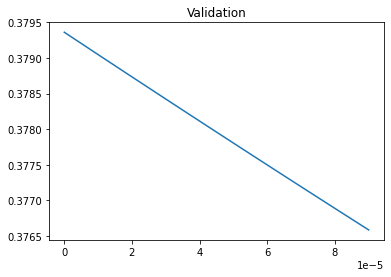

In [32]:
# sns.set_style("white")
# # Now let us look at a chart about the coefficients in the model:
alphas = np.arange(0,0.0001,0.00001)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
# plt.xlabel("alpha")
# plt.ylabel("rmse")

In [33]:
cv_ridge[cv_ridge.values == cv_ridge.min()]

0.00009    0.376584
dtype: float64

In [34]:
ridge_clf = Ridge(alpha = 0.7).fit(x_train, y_train)

In [35]:
clf = LassoCV().fit(x_train, y_train)
importance = np.abs(clf.coef_)
print(importance)

idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.001

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(x_train, y_train)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.0143583  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.40140378]
Selected features: ['population_change' 'shape_factor']


ValueError: X has a different shape than during fitting.

In [ ]:
# plt.title(
#     "Features from diabets using SelectFromModel with "
#     "threshold %0.3f." % sfm.threshold)
# feature1 = X_transform[:, 0]
# feature2 = X_transform[:, 1]
# plt.plot(feature1, feature2, 'r.')
# plt.xlabel("First feature: {}".format(name_features[0]))
# plt.ylabel("Second feature: {}".format(name_features[1]))
# plt.ylim([np.min(feature2), np.max(feature2)])
# plt.show()

In [ ]:
# ridge_importance = np.abs(ridge_clf.coef_)
# np.round(ridge_importance,3)

# feature_names = numeric_columns
# idx_third = ridge_importance.argsort()[-3]
# print(ridge_importance.argsort())

# ridge_threshold = ridge_importance[idx_third] + 0.000001
# print('Threshold is: {}'.format(ridge_threshold))

# # # How many features do we want?
# # # Get the indicies
# idx_features = (-ridge_importance).argsort()

# # # subset by the indicies
# name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(name_features))

In [ ]:
# ###Model Lasso regression
# coef = pd.Series(model_ridge.coef_, index = x_train.columns)
# coef.head()

In [ ]:
# ###Model Lasso regression
# model_lasso = LassoCV(alphas=alphas).fit(x_train, y_train.values.ravel())
# coef = pd.Series(model_lasso.coef_, index = x_train.columns)
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

In [ ]:
# import matplotlib
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

### Creating Baseline Accuracy

In [ ]:
#calcualte the average score of the train dataset
mean_claims = y_train.mean()
print("Average Claims :",mean_claims) 

In [ ]:
#Calculate the Mean Absolute Error on the test dataset
# print("MAE for Test Data:",abs(y_test - mean_claims).mean()[0])

In [37]:
y_test

0     0.160344
1     0.572132
2     0.135722
3     0.006695
4     0.143611
5     0.050430
6     0.134347
7     0.000000
8     0.015481
9     0.418151
10    0.001014
11    0.232056
12    0.267203
13    0.502305
14    0.025332
15    0.240614
16    0.131082
17    0.259529
18    0.242024
19    0.029413
Name: claims_total_building_insurance_coverage_avg, dtype: float64

# -------------- Deep Learning ------------------
### Designing the Deep Neural Network

In [ ]:
# #Use the model's evaluate method to predict and evaluate the test datasets
# result = model.evaluate(x_test,y_test)

# #Print the results
# for i in range(len(model.metrics_names)):
#     print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

In [38]:


model3 = Sequential()
model3.add(Dense(150, input_dim = 25, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(1, activation = "linear", use_bias=True))

model3.compile(optimizer='sgd',loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])

model3.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=30,batch_size=64)

result = model3.evaluate(x_test,y_test)
for i in range(len(model3.metrics_names)):
    print("Metric ",model3.metrics_names[i],":",str(round(result[i],2)))


Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 0.0767 - root_mean_squared_error: 0.276 - 0s 236ms/step - loss: 0.0858 - root_mean_squared_error: 0.2930 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 0.0748 - root_mean_squared_error: 0.273 - 0s 49ms/step - loss: 0.0763 - root_mean_squared_error: 0.2762 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1052
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.0764 - root_mean_squared_error: 0.276 - 0s 50ms/step - loss: 0.0693 - root_mean_squared_error: 0.2633 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1032
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 0.0655 - root_mean_squared_error: 0.256 - 0s 49ms/step - loss: 0.0654 - root_mean_squared_error: 0.2558 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1029
Epoch 5/30
2/2 [==============================] - ETA: 0s - loss: 0.0613 - root_mean_square

### EARLY STOPPING

In [39]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=4)]

model4 = Sequential()
model4.add(Dense(350,input_dim = 25, activation="relu"))
model4.add(Dropout(0.2, input_shape=(25,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(25,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(25,)))
# model4.add(Dense(350,activation="relu"))
# model4.add(Dropout(0.2, input_shape=(25,)))
# model4.add(Dense(350,activation="relu"))
# model4.add(Dropout(0.2, input_shape=(25,)))
model4.add(Dense(1, activation = "linear"))

model4.compile(optimizer='adam',loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

model4.fit(x_train,y_train, 
           validation_data=(x_val,y_val), 
           epochs=150,
           batch_size=64)
#,callbacks=callbacks)

result = model4.evaluate(x_test,y_test)

for i in range(len(model4.metrics_names)):
    print("Metric ",model4.metrics_names[i],":",str(round(result[i],2)))
    


Epoch 1/150
2/2 [==============================] - ETA: 0s - loss: 0.0895 - root_mean_squared_error: 0.299 - 0s 199ms/step - loss: 0.0845 - root_mean_squared_error: 0.2908 - val_loss: 0.1391 - val_root_mean_squared_error: 0.3730
Epoch 2/150
2/2 [==============================] - ETA: 0s - loss: 0.1204 - root_mean_squared_error: 0.347 - 0s 127ms/step - loss: 0.1137 - root_mean_squared_error: 0.3372 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1760
Epoch 3/150
2/2 [==============================] - ETA: 0s - loss: 0.0549 - root_mean_squared_error: 0.234 - 0s 64ms/step - loss: 0.0536 - root_mean_squared_error: 0.2316 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1228
Epoch 4/150
2/2 [==============================] - ETA: 0s - loss: 0.0575 - root_mean_squared_error: 0.239 - 0s 65ms/step - loss: 0.0634 - root_mean_squared_error: 0.2517 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1247
Epoch 5/150
2/2 [==============================] - ETA: 0s - loss: 0.0737 - root_mean_

Epoch 37/150
2/2 [==============================] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.156 - 0s 57ms/step - loss: 0.0235 - root_mean_squared_error: 0.1533 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1378
Epoch 38/150
2/2 [==============================] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.138 - 0s 74ms/step - loss: 0.0182 - root_mean_squared_error: 0.1351 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188
Epoch 39/150
2/2 [==============================] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.130 - 0s 47ms/step - loss: 0.0171 - root_mean_squared_error: 0.1310 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1115
Epoch 40/150
2/2 [==============================] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.142 - 0s 50ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 41/150
2/2 [==============================] - ETA: 0s - loss: 0.0150 - root_me

Epoch 73/150
2/2 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.100 - 0s 57ms/step - loss: 0.0100 - root_mean_squared_error: 0.1001 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1414
Epoch 74/150
2/2 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.087 - 0s 58ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1508
Epoch 75/150
2/2 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.089 - 0s 58ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 76/150
2/2 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.082 - 0s 64ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1740
Epoch 77/150
2/2 [==============================] - ETA: 0s - loss: 0.0099 - root_me

Epoch 109/150
2/2 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.069 - 0s 62ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 110/150
2/2 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.068 - 0s 55ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1725
Epoch 111/150
2/2 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.076 - 0s 55ms/step - loss: 0.0057 - root_mean_squared_error: 0.0752 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1799
Epoch 112/150
2/2 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.066 - 0s 64ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1832
Epoch 113/150
2/2 [==============================] - ETA: 0s - loss: 0.0048 - ro

Epoch 145/150
2/2 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.080 - 0s 49ms/step - loss: 0.0060 - root_mean_squared_error: 0.0778 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 146/150
2/2 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.085 - 0s 50ms/step - loss: 0.0070 - root_mean_squared_error: 0.0840 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1630
Epoch 147/150
2/2 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.059 - 0s 58ms/step - loss: 0.0052 - root_mean_squared_error: 0.0721 - val_loss: 0.0400 - val_root_mean_squared_error: 0.1999
Epoch 148/150
2/2 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.070 - 0s 50ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2255
Epoch 149/150
2/2 [==============================] - ETA: 0s - loss: 0.0079 - ro

In [40]:
# invert transform on predictions
yhat = model4.predict(x_test)
yhat = scalarY.inverse_transform(yhat)
yhat=np.round(yhat,2)

In [41]:
DF = pd.DataFrame(
    data=np.round(yhat,2), columns=['predicted']
)

In [42]:
y_test

0     0.160344
1     0.572132
2     0.135722
3     0.006695
4     0.143611
5     0.050430
6     0.134347
7     0.000000
8     0.015481
9     0.418151
10    0.001014
11    0.232056
12    0.267203
13    0.502305
14    0.025332
15    0.240614
16    0.131082
17    0.259529
18    0.242024
19    0.029413
Name: claims_total_building_insurance_coverage_avg, dtype: float64

In [43]:
DF['observed'] = scalarY.inverse_transform(pd.DataFrame(y_test)).round(2)

In [44]:
DF['predicted']=DF.predicted.round(2)

In [45]:
DF

,predicted,observed
0,15826.160156,15823.07
1,6350.310059,56459.03
2,9475.040039,13393.26
3,-354.859985,660.63
4,38752.039062,14171.84
5,1258.290039,4976.55
6,14847.759766,13257.58
7,11771.400391,0.00
8,22375.210938,1527.65
9,23705.919922,41263.91


### Visualing the final results

In [ ]:
# pip install -U shap

In [50]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 25, replace=False)]


KeyError: "None of [Int64Index([32, 29, 24,  0, 59, 41, 42,  1, 31, 18, 27, 52, 71,  2, 55, 58, 68,\n            53, 14, 19, 10, 39, 47, 45, 13],\n           dtype='int64')] are in the [columns]"

In [52]:
import tensorflow as tf
# explain predictions of the model on four images
e = shap.DeepExplainer(model4, x_train)
# ...or pass tensors directly


In [56]:
x_test[1:5]

,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,buildings_aae_count,...,railroads_km,population_density,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg
1,0.576923,0.307576,0.121489,0.000000,0.123100,0.110142,0.0,0.128205,0.112770,0.032538,...,0.172692,0.089685,0.530777,0.054521,0.865847,0.163031,0.215228,0.000000,0.638120,0.368763
2,0.096154,0.023872,0.013063,0.000000,0.063830,0.046892,0.0,0.153846,0.280077,0.046367,...,0.346643,0.200063,0.940349,0.103648,0.718894,0.585944,0.549457,0.023737,0.571371,0.364799
3,0.596154,0.023872,0.013063,0.283333,0.112462,0.022356,0.0,0.051282,0.101833,0.001627,...,0.000000,0.002462,0.484481,0.046580,0.889913,0.154606,0.196555,0.023737,0.571371,0.198277
4,0.480769,0.182144,0.050294,0.525000,0.688450,0.128135,0.0,0.487179,0.086314,0.000271,...,0.000000,0.030362,0.590347,0.045923,0.737839,0.007842,0.000715,0.006317,0.264762,0.613777


In [57]:
# # e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
# shap_values = e.shap_values(x_test[1:5])

# # plot the feature attributions
# shap.image_plot(shap_values, -x_test[1:5])

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title("Model's Training & Validation loss across epochs")
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()


In [ ]:
# permutation feature importance with knn for regression
# from sklearn.datasets import make_regression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.inspection import permutation_importance
# from matplotlib import pyplot

# X=df_data.loc[:, df_data.columns != 'claims_total_building_insurance_coverage_avg']
# y=df_data.loc[:, df_data.columns == 'claims_total_building_insurance_coverage_avg']

# # define the model
# model = KNeighborsRegressor()
# # fit the model
# model.fit(X, y)
# # perform permutation importance
# results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# # get importance
# importance = results.importances_mean
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [ ]:
train.iloc[:, [39]]